# 서울시 구별 CCTV 현황 분석
* 서울시 CCTV 설치운영 현황 데이터
* 서울시 구별 주민등록인구 통계 데이터

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시 시작

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

## CCTV 데이터 파악하고 정리하기

In [2]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 서울시CCTV설치운영현황(자치구)_년도별_210731기준.csv to 서울시CCTV설치운영현황(자치구)_년도별_210731기준.csv


In [3]:
cctv = pd.read_csv(filename, skiprows=1, encoding='euc-kr')
cctv.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,계,"77,032","7,667","2,200","3,491","4,439","6,582","8,129","9,947","9,876","11,961","11,132","1,608"
1,종로구,"1,772",813,0,0,210,150,1,261,85,9,200,43
2,중 구,"2,333",16,114,87,77,236,240,372,386,155,361,289
3,용산구,"2,383",34,71,234,125,221,298,351,125,307,617,0
4,성동구,"3,602",448,125,212,105,339,310,874,390,262,461,76


In [5]:
# Null data 있는지 확인
cctv.isnull().sum().sum()

0

In [6]:
for column in cctv.columns[1:]:
  cctv[column] = cctv[column].apply(lambda x: int(x.replace(',', '')))
cctv.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,계,77032,7667,2200,3491,4439,6582,8129,9947,9876,11961,11132,1608
1,종로구,1772,813,0,0,210,150,1,261,85,9,200,43
2,중 구,2333,16,114,87,77,236,240,372,386,155,361,289
3,용산구,2383,34,71,234,125,221,298,351,125,307,617,0
4,성동구,3602,448,125,212,105,339,310,874,390,262,461,76


In [7]:
cctv.rename(columns={'구분': '구별'}, inplace=True)
cctv['2017년_이전'] = cctv.총계 - cctv['2018년'] - cctv['2019년'] - cctv['2020년'] - cctv['2021년']
cctv['최근증가율'] = ((cctv['2018년']+cctv['2019년']+cctv['2020년']) / cctv['2017년_이전'] * 100).round(2)
cctv = cctv[['구별','총계','최근증가율']]
cctv.head()

,구별,총계,최근증가율
0,계,77032,77.66
1,종로구,1772,20.49
2,중 구,2333,78.98
3,용산구,2383,78.64
4,성동구,3602,46.13


In [8]:
cctv['구별'] = cctv.구별.apply(lambda x: x.replace(' ',''))
cctv.구별.unique()

array(['계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [9]:
# 첫번째 행 제거
cctv.drop([0], inplace= True)
cctv.head()

,구별,총계,최근증가율
1,종로구,1772,20.49
2,중구,2333,78.98
3,용산구,2383,78.64
4,성동구,3602,46.13
5,광진구,2588,112.29


In [10]:
cctv.columns = ['구별','CCTV댓수','최근증가율']
cctv.head()

,구별,CCTV댓수,최근증가율
1,종로구,1772,20.49
2,중구,2333,78.98
3,용산구,2383,78.64
4,성동구,3602,46.13
5,광진구,2588,112.29


In [11]:
# 최근증가율 Top 5
cctv.sort_values(by='최근증가율', ascending=False).head()

,구별,CCTV댓수,최근증가율
9,강북구,2462,446.95
24,송파구,2854,203.19
7,중랑구,3296,191.07
18,금천구,2374,149.47
12,은평구,3791,117.86


In [12]:
# CCTV 댓수 Top 5
cctv.sort_values(by='CCTV댓수', ascending=False).head()


,구별,CCTV댓수,최근증가율
23,강남구,6502,61.64
21,관악구,4942,49.91
17,구로구,4075,48.83
8,성북구,3958,94.53
12,은평구,3791,117.86


## 인구데이터 파악하고 정리하기

In [13]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 서울시주민등록인구(구별)통계.tsv to 서울시주민등록인구(구별)통계.tsv


In [26]:
pop = pd.read_csv(filename, sep='\t', skiprows=2)
pop.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2021.2/4,합계,"4,405,638","9,795,426","4,756,178","5,039,248","9,565,990","4,649,442","4,916,548","229,436","106,736","122,700",2.17,"1,576,971"
1,2021.2/4,종로구,"73,525","155,106","75,009","80,097","146,029","70,985","75,044","9,077","4,024","5,053",1.99,"27,605"
2,2021.2/4,중구,"62,897","132,259","64,526","67,733","123,016","60,019","62,997","9,243","4,507","4,736",1.96,"23,980"
3,2021.2/4,용산구,"111,650","240,665","116,858","123,807","226,378","108,948","117,430","14,287","7,910","6,377",2.03,"38,884"
4,2021.2/4,성동구,"134,542","295,767","143,927","151,840","289,162","141,042","148,120","6,605","2,885","3,720",2.15,"45,591"


In [27]:
pop = pop[['자치구','계','계.1','계.2','65세이상고령자']]
pop.columns = ['구별','인구수','내국인','외국인','고령자']
pop.drop([0], inplace=True)
pop.head()

,구별,인구수,내국인,외국인,고령자
1,종로구,"155,106","146,029","9,077","27,605"
2,중구,"132,259","123,016","9,243","23,980"
3,용산구,"240,665","226,378","14,287","38,884"
4,성동구,"295,767","289,162","6,605","45,591"
5,광진구,"355,306","342,481","12,825","50,815"


In [29]:
for column in pop.columns[1:]:
    pop[column] = pop[column].apply(lambda x: int(x.replace(',','')))
pop.head()

,구별,인구수,내국인,외국인,고령자
1,종로구,155106,146029,9077,27605
2,중구,132259,123016,9243,23980
3,용산구,240665,226378,14287,38884
4,성동구,295767,289162,6605,45591
5,광진구,355306,342481,12825,50815


In [30]:
pop['외국인비율'] = np.round(pop.외국인/pop.인구수*100, 2)
pop['고령자비율'] = np.round(pop.고령자/pop.인구수*100, 2)
pop.head()

,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율
1,종로구,155106,146029,9077,27605,5.85,17.80
2,중구,132259,123016,9243,23980,6.99,18.13
3,용산구,240665,226378,14287,38884,5.94,16.16
4,성동구,295767,289162,6605,45591,2.23,15.41
5,광진구,355306,342481,12825,50815,3.61,14.30


### CCTV 데이터와 인구 데이터 합치고 분석하기

In [31]:
df = pd.merge(cctv,pop)
df.set_index('구별', inplace =True)
df.head()

,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
종로구,1772,20.49,155106,146029,9077,27605,5.85,17.80
중구,2333,78.98,132259,123016,9243,23980,6.99,18.13
용산구,2383,78.64,240665,226378,14287,38884,5.94,16.16
성동구,3602,46.13,295767,289162,6605,45591,2.23,15.41
광진구,2588,112.29,355306,342481,12825,50815,3.61,14.30


In [33]:
df.shape

(25, 8)

* 상관관계 분석 (상관관계계수)

In [34]:
# 고령자 비율과 CCTV 수
np.corrcoef(df.고령자비율, df.CCTV댓수)

array([[ 1.        , -0.39498052],
       [-0.39498052,  1.        ]])

In [35]:
# 외국인 비율과 CCTV 댓수
np.corrcoef(df.외국인비율, df.CCTV댓수)

array([[ 1.        , -0.17513977],
       [-0.17513977,  1.        ]])

In [36]:
# 인구수와 CCTV 댓수
np.corrcoef(df.인구수, df.CCTV댓수)

array([[1.        , 0.45609487],
       [0.45609487, 1.        ]])

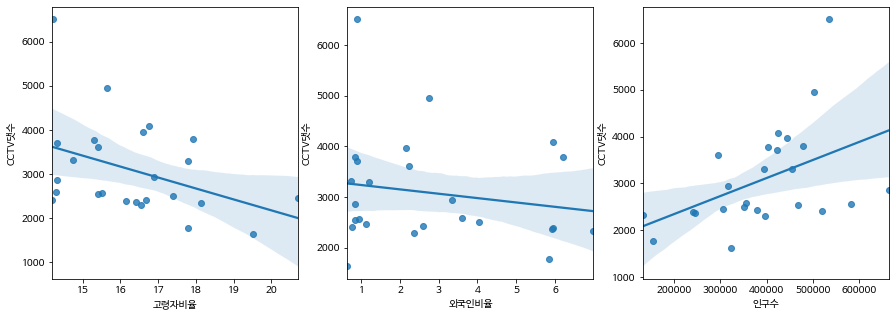

In [37]:
fig, axs = plt.subplots(figsize=(15,5), ncols=3, nrows=1)
features = ['고령자비율','외국인비율','인구수']
for i, feature in enumerate(features):
    row, col = i//4, i%4
    sns.regplot(x=feature, y='CCTV댓수', data=df, ax=axs[col])

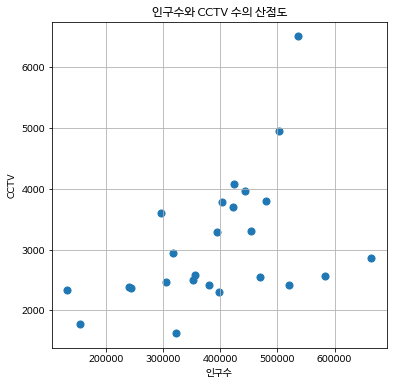

In [38]:
# 인구수와 CCTV 댓수의 산점도
plt.figure(figsize=(6,6))
plt.scatter(df.인구수, df.CCTV댓수, s=50)
plt.grid(True)
plt.title('인구수와 CCTV 수의 산점도')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

In [39]:
# 산점도 위에 상관관계를 나타내는 선 그리기
fp1 = np.polyfit(df.인구수, df.CCTV댓수, 1)
fp1

array([3.85119765e-03, 1.57231514e+03])

In [40]:
fx = np.array([100000, 700000])
f1 = np.poly1d(fp1)
fy = f1(fx)
fy

array([1957.43490106, 4268.1534916 ])

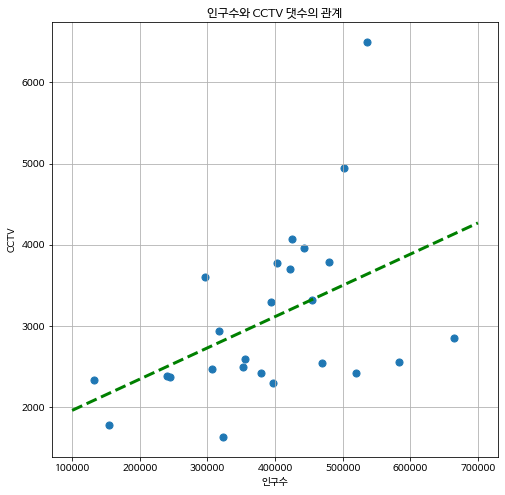

In [42]:
plt.figure(figsize=(8,8))
plt.scatter(df.인구수, df.CCTV댓수, s=50)
plt.plot(fx, fy, ls='dashed', lw=3, color='g')
plt.grid(True)
plt.title('인구수와 CCTV 댓수의 관계')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

In [43]:
# 오차 표시하기 (초록선에서 멀리 떨어진 점)

df['오차'] = np.abs(df.CCTV댓수 - f1(df.인구수)).round(2)
df_sort = df.sort_values('오차', ascending=False)
df_sort.head()

,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,6502,61.64,536107,531375,4732,76184,0.88,14.21,2865.03
관악구,4942,49.91,502698,488800,13898,78647,2.76,15.64,1433.70
송파구,2854,203.19,664341,658670,5671,95164,0.85,14.32,1276.82
강서구,2560,78.53,582995,577519,5476,90404,0.94,15.51,1257.54
도봉구,1629,82.82,322419,320365,2054,62894,0.64,19.51,1185.01


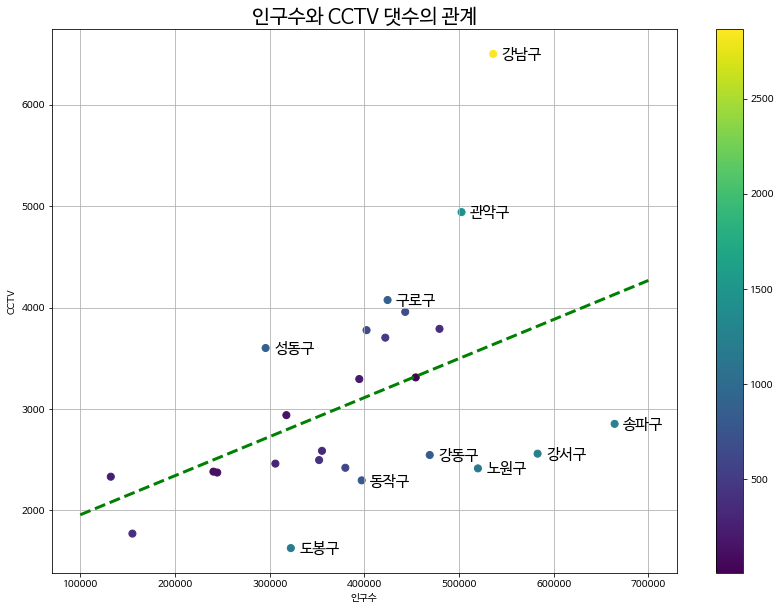

In [44]:
plt.figure(figsize=(14,10))
plt.scatter(df.인구수, df.CCTV댓수, c=df.오차, s=50)
plt.plot(fx, fy, ls='dashed', lw=3, color='g')

for i in range(10): 
    plt.text(df_sort.인구수[i]+9000, df_sort.CCTV댓수[i]-50,
             df_sort.index[i], fontsize=15)

plt.grid(True)
plt.title('인구수와 CCTV 댓수의 관계', fontsize=20)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar()
plt.show()

### CCTV 현황 그래프로 분석하기

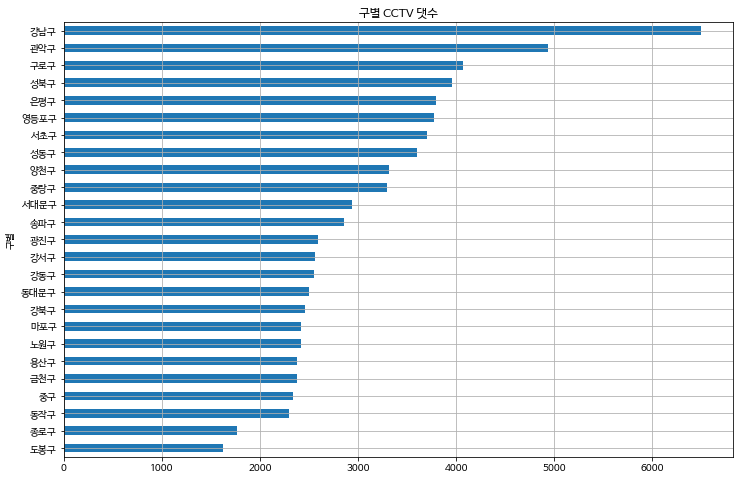

In [45]:
df.CCTV댓수.sort_values().plot(kind='barh', grid=True, figsize=(12,8), title='구별 CCTV 댓수')
plt.show()

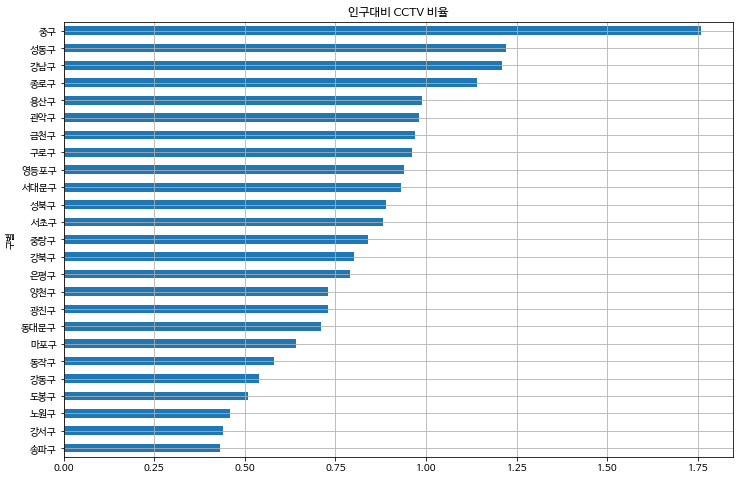

In [46]:
# 인구대비 CCTV 비율
df['cctv비율'] = (df.CCTV댓수 / df.인구수 * 100).round(2)
df.cctv비율.sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('인구대비 CCTV 비율')
plt.show()